# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [3]:
import numpy as np

def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

In [8]:
priors = [1/2, 1/2]
likelihoods = [30/40, 20/40]
bayes_rule(priors, likelihoods)

array([0.6, 0.4])

What is the probability that it came from Bowl 2?

In [9]:
#Para el BOWL 1 = 0.6
#Para el BOWL 2 = 0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [10]:
chocoprior = [1/2, 1/2]
chocolike = [10/40, 20/40]
bayes_rule(chocoprior, chocolike)

array([0.33333333, 0.66666667])

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [17]:
bags = [1/2, 1/2]
yellow_candy = [0.20,0.14]
bayes_rule(bags, yellow_candy)

array([0.58823529, 0.41176471])

In [15]:
bags = [1/2, 1/2]
green_candy = [0.10,0.20]
bayes_rule(bags,green_candy)

array([0.33333333, 0.66666667])

What is the probability that the yellow candy came from Bag 2?

In [ ]:
# Probability of 67%

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [23]:
#La probabilidad de elegir la puerta correcta es 1/3. 
#0.33 por cada 
doors = [1/3, 1/3, 1/3]
chance = [1/2,1,0]
bayes_rule(doors, chance)


array([0.33333333, 0.66666667, 0.        ])

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [11]:
new_users = 14
def modelo_generativo(parametro):
    resultado = np.random.binomial(100, parametro)
    return resultado

Produce a set of descriptive statistics for the posterior distribution.

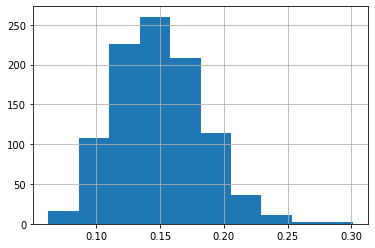

In [19]:
datos = list()
n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

for p in prior:
    datos.append(modelo_generativo(p))
    
posterior = prior[list(map(lambda x: x == new_users, datos))]
posterior.hist()

What is the 90% credible interval range?

In [22]:
print(posterior.quantile(.025),'|',posterior.quantile(.90))

0.08928295277336795 | 0.19081587446568182


What is the Maximum Likelihood Estimate?

In [25]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.14 | 0.1342828077314344
